<a href="https://colab.research.google.com/github/pedroAndrad1/alura_formacao_machine_learning_projeto/blob/master/Machine_Learning_Projeto_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

#Pedro Paulo Araujo de Andrade

Os dados são um conjunto de informações sobre os candidatos do ENEM, porém apenas as informações que dizem respeito a nota serão úteis aqui.

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
"""
import warnings
warnings.simplefilter("once")

!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet
!pip install yellowbrick=="0.9.0" --quiet
!pip install numpy=="1.16.0" --quiet

"""

'\nimport warnings\nwarnings.simplefilter("once")\n\n!pip install pandas=="0.24.0" --quiet\n!pip install seaborn=="0.9.0" --quiet\n!pip install scipy=="1.2.0" --quiet\n!pip install yellowbrick=="0.9.0" --quiet\n!pip install numpy=="1.16.0" --quiet\n\n'

In [2]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 0.24.2
Usando seaborn 0.9.0
Usando scipy 1.3.0
Usando yellowbrick 0.9.1
Usando numpy 1.16.4


In [0]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [4]:
# solução
#Estava com dificuldade para ler o arquivo localmente, por isso upei ele em meu
#Drive. Espero que isso não seja um problema. Caso seja, desculpe pelo transtorno.

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1swvGE8AYkIJRxkb77vce42-x8zFBWlra'
downloaded= drive.CreateFile({'id': file_id})
downloaded.GetContentFile('MICRODADOS_ENEM_2017.csv')

     |████████████████████████████████| 993kB 3.5MB/s 


In [0]:
enem = pd.read_csv('MICRODADOS_ENEM_2017.csv', sep=';', encoding='iso-8859-1',
                    usecols= ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC",
                              "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2",
                              "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"] )

#Legenda


NU_NOTA_CN: Nota da prova de Ciências da natureza

NU_NOTA_CH: Nota da prova de Ciências Humanas

NU_NOTA_LC: Nota da prova de Linguagens e Códigos

NU_NOTA_MT: Nota da prova de Matemática

NU_NOTA_COMP1: Nota de competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa

NU_NOTA_COMP2: Nota de competência 2 - Compreender a proposta da redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa

NU_NOTA_COMP3: Nota de competência 3 - Selecionar, relacionar, organizar, e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista

NU_NOTA_COMP4: Nota de competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação

NU_NOTA_COMP5: Nota de competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos



In [6]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [7]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [8]:
# solução

todas_as_notas = enem.columns
todas_as_notas

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5'],
      dtype='object')

In [9]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

Usarei a função dropna do pandas para dropar as linhas com valores inválidos.

docs:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [10]:
# solução

#Dropando todas as linhas que possuem  um valor inválido
#e sobrescrevendo o dataframe retornado na varíavel enem.

enem = enem.dropna(how = 'any')

#Imprimindo as 5 primeiras, nao necessariamente as maiores,
#notas na coluna das notas de Matematica,

enem.NU_NOTA_MT.head()

0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

Usarei a função sum do pandas para somar as colunas do dataframe.

docs:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [11]:
# solução e impressão

#O axis igual a 1 para somar as colunas.

#OBS: Notei que se executasse essa celula mais de uma vez, as somas iam
#acumulando. Caso isso aconteca, restarte o runtime.
enem['nota_total'] = enem.sum(axis= 1)
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000,2681.400
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000,2949.500
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000,2786.700
5,558.800,594.900,522.800,578.500,120.000,120.000,120.000,120.000,60.000,2795.000
6,625.900,636.800,588.300,607.500,100.000,100.000,80.000,80.000,40.000,2858.500


Usarei a função distplot do seaborn para plotar o histograma das notas totais, a função mean para mediana, median para média e std para desvio padrão, sendo estas três últimas da biblioteca pandas.

docs:

https://seaborn.pydata.org/generated/seaborn.distplot.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html

A média das notas totais foi igual a 2569.3
A mediana das notas totais foi igual a 2592.75
O desvio padrão das notas totais foi igual a 395.99


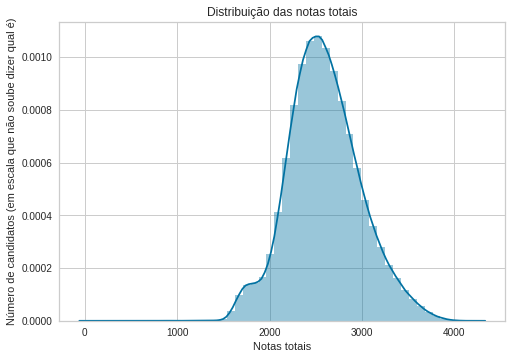

In [12]:
# solução histograma e descrição
import matplotlib.pyplot as plt

plt.title("Distribuição das notas totais")
plt.ylabel("Número de candidatos (em escala que não soube dizer qual é)")
sns.distplot(enem.nota_total, axlabel = "Notas totais")

print("A média das notas totais foi igual a", enem.nota_total.median())
print("A mediana das notas totais foi igual a %.2f" % enem.nota_total.mean())
print("O desvio padrão das notas totais foi igual a %.2f" % enem.nota_total.std())

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

docs das funções usadas:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

https://matplotlib.org/3.1.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

Enem EDA sampling tem a distribuição
A média das notas totais foi igual a 2570.30
A mediana das notas totais foi igual a 2592.96
O desvio padrão das notas totais foi igual a 396.34


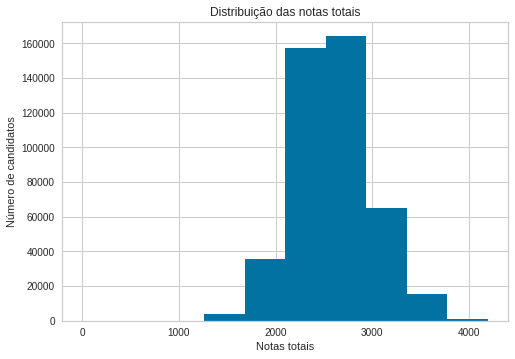

In [13]:
# solução sua função de sampling

def eda_sample(enem):
    # seed
    np.random.seed(745)
    
    # 1% de sample em enem_eda
    enem_eda = enem.sample(frac = 0.1)
    
    print("Enem EDA sampling tem a distribuição")
    
    # descreva a nota_total
    print("A média das notas totais foi igual a %.2f" % enem_eda.nota_total.median())
    print("A mediana das notas totais foi igual a %.2f" % enem_eda.nota_total.mean())
    print("O desvio padrão das notas totais foi igual a %.2f" % enem_eda.nota_total.std())
    # plote o histograma da nota_total e mostre com plt.show()
    
    n, bins, patches = plt.hist(enem_eda.nota_total) 
    
    plt.xlabel("Notas totais")
    plt.ylabel("Número de candidatos")
    plt.title("Distribuição das notas totais")
    plt.show()
    
    return enem_eda

enem_eda = eda_sample(enem)

Conseguimos resultados muito similares a quando utilizamos todos os dados.

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

Usarei a função corr do pandas para obter uma matriz de correlação e usar a função heatmap do seaborn para plotar essas informações.

docs:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html
https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [14]:
# solução

#Já adicionei a coluna nota_total ao dataframe anteriormente

corr = enem.corr()
corr

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.612,0.570,0.549,0.345,0.319,0.390,0.384,0.356,0.733
NU_NOTA_CH,0.612,1.000,0.708,0.570,0.398,0.359,0.436,0.427,0.394,0.794
NU_NOTA_LC,0.570,0.708,1.000,0.542,0.441,0.370,0.455,0.446,0.396,0.776
NU_NOTA_MT,0.549,0.570,0.542,1.000,0.357,0.325,0.394,0.391,0.353,0.760
NU_NOTA_COMP1,0.345,0.398,0.441,0.357,1.000,0.774,0.833,0.862,0.594,0.726
NU_NOTA_COMP2,0.319,0.359,0.370,0.325,0.774,1.000,0.859,0.796,0.631,0.693
NU_NOTA_COMP3,0.390,0.436,0.455,0.394,0.833,0.859,1.000,0.867,0.673,0.773
NU_NOTA_COMP4,0.384,0.427,0.446,0.391,0.862,0.796,0.867,1.000,0.653,0.761
NU_NOTA_COMP5,0.356,0.394,0.396,0.353,0.594,0.631,0.673,0.653,1.000,0.677
nota_total,0.733,0.794,0.776,0.760,0.726,0.693,0.773,0.761,0.677,1.000


In [0]:
if(corr.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

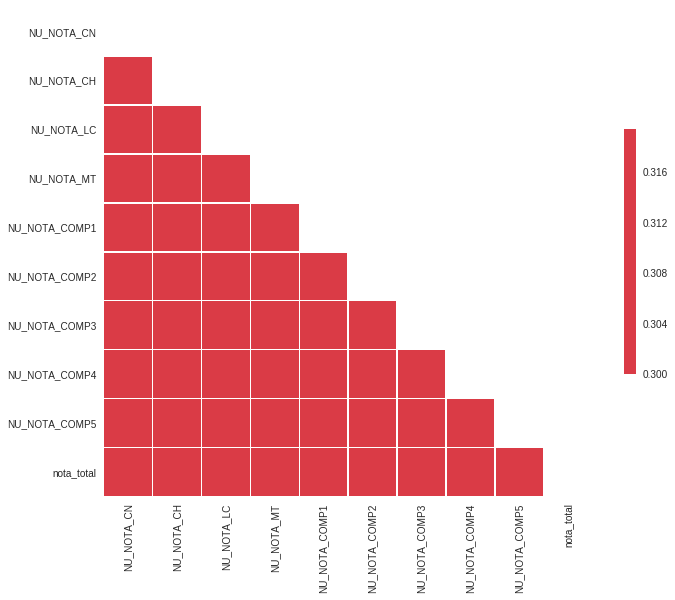

In [16]:
#Copie esse codigo da documentacao do seaborn, terceiro link no text acima.

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Olhando a matriz de correlação e o heatmap criado a partir dela, podemos perceber que as variáveis influenciam-se entre si de maneira  diretamente proporcional.

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

Usarei a função loc do pandas para selecionar a linha nota_total.

docs:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [17]:
# solução: cálculo da tabela de correlação com todas as notas
corr_nota_total = corr.loc['nota_total']
print(corr_nota_total)
print(corr_nota_total.shape)

NU_NOTA_CN      0.733
NU_NOTA_CH      0.794
NU_NOTA_LC      0.776
NU_NOTA_MT      0.760
NU_NOTA_COMP1   0.726
NU_NOTA_COMP2   0.693
NU_NOTA_COMP3   0.773
NU_NOTA_COMP4   0.761
NU_NOTA_COMP5   0.677
nota_total      1.000
Name: nota_total, dtype: float64
(10,)


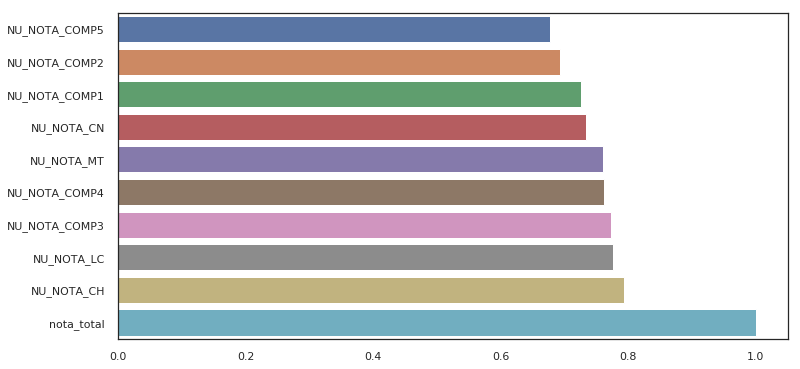

In [18]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = dados.sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(corr_nota_total)

Podemos perceber que a nota de ciências humanas é que tem a maior relação com a nota total.

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [19]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos

interesse = enem_eda[ ["NU_NOTA_MT", "NU_NOTA_LC", "nota_total" ] ]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
3066813,418.700,514.900,2471.600
249978,652.200,466.100,2807.900
2399891,532.700,539.900,2577.300
3959805,578.500,647.300,3198.700
5505273,374.900,419.900,2247.700


In [0]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    np.random.seed(745)
    train_x, test_x, train_y, test_y = train_test_split(dados[['NU_NOTA_MT', 'NU_NOTA_LC']], dados.nota_total)
    
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [21]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 2) (332007,) (110669, 2) (110669,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 397.2040742092078


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

docs:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [0]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    modelo = LinearRegression()
    modelo.fit(train_x, train_y)
    
    # calcule o r2_score com os dados de teste
    r2_score = modelo.score(test_x, test_y)
    
    # calcule a predição e os dois tipos de erros
    test_pred = modelo.predict(test_x)
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    
    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    
    return modelo

In [24]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.7673870486246884
mse 36699.26414637312
mae 142.91231382446276


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

Como o erro médio absoluto e bem menor que o desvio padrão dos testes, creio que seja um erro satisfatório.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

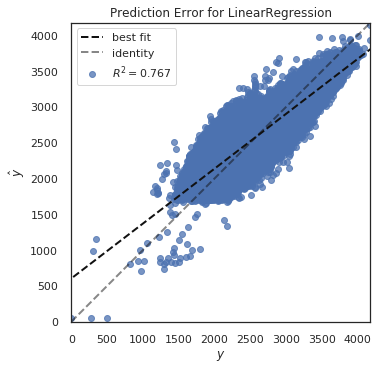

In [25]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

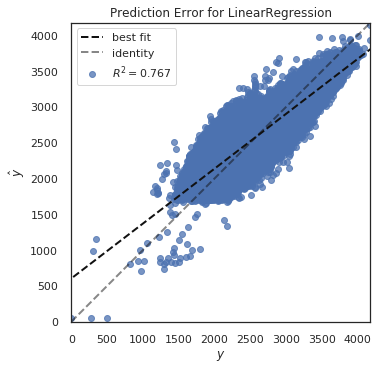

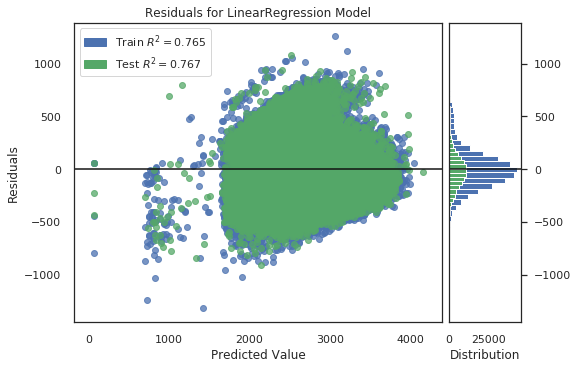

In [26]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [0]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)
    
#Precisarei fazer uma modificacao na funcao split para se adequar a esta situacao    
def split(dados):
    np.random.seed(745)
    
    #selecionando todas as colunas menos a coluna nota_total.
    x= dados.loc[:, dados.columns != 'nota_total']
    
    train_x, test_x, train_y, test_y = train_test_split(x, dados.nota_total)
    
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 9) (332007,) (110669, 9) (110669,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 397.2040742092078
********************************************************************************
r2 score 1.0
mse 9.209435561479135e-25
mae 8.737529299592479e-13


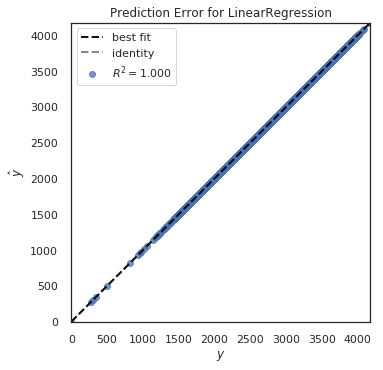

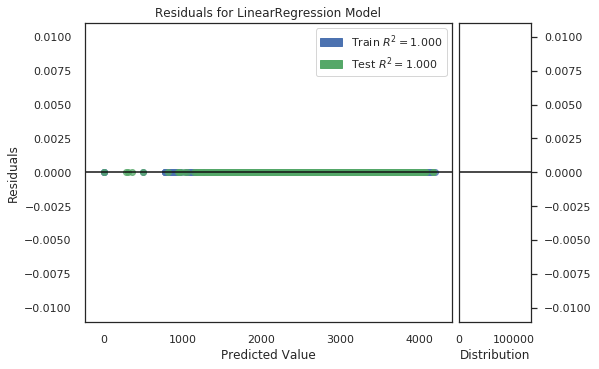

In [28]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total

regressao_completa_para(enem_eda.columns)


Parece que o modelo linear se sai incrivelmente bem usando todas as varíaveis. O que era esperado, já que a nota final é uma combinação linear das outras notas.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 8) (332007,) (110669, 8) (110669,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 397.2040742092078
********************************************************************************
r2 score 0.9824401853518221
mse 2770.405827898504
mae 40.455594933574844


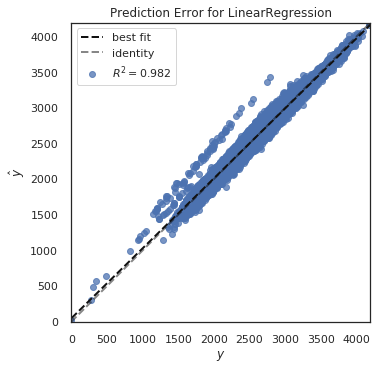

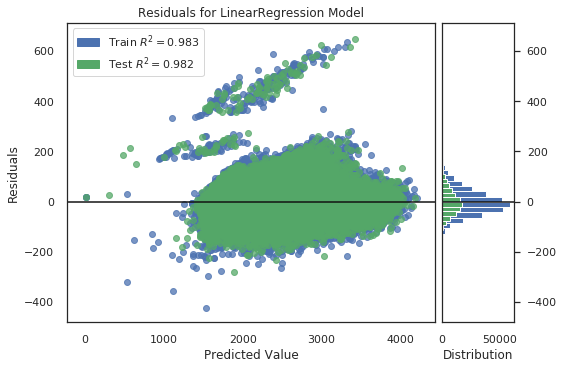

In [29]:
# solução 2: teste outra combinação
#teste com 8 notas. Vou usar todas as notas menos a de ciencias humanas,
#que se mostrou a que tem mais correlacao com a nota total.

interesse = enem_eda.loc[:, enem_eda.columns != 'NU_NOTA_CH']
regressao_completa_para(interesse.columns)


Vemos que a falta da varíavel mais correlacionada com a nota total faz diferença, embora o R2 continue bem perto de um.

A partir de agora vou tirando as varíaveis menos correlacionadas com a coluna nota_total

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 8) (332007,) (110669, 8) (110669,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'] como X
Desvio padrão do conjunto de testes 397.2040742092078
********************************************************************************
r2 score 0.9928259508307953
mse 1131.8472333680152
mae 26.521066648959007


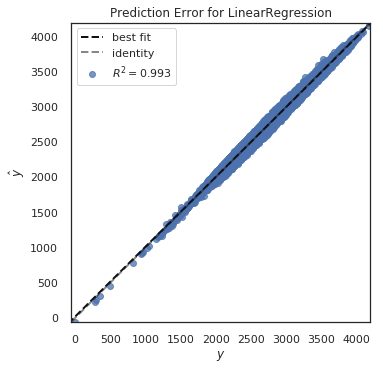

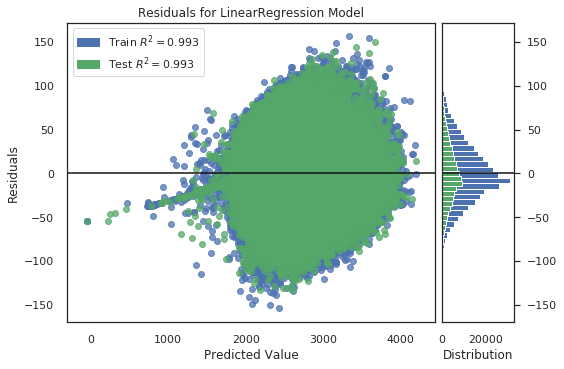

In [30]:
# solução 3: teste outra combinação

interesse = enem_eda.loc[:, enem_eda.columns != 'NU_NOTA_COMP5']
regressao_completa_para(interesse.columns)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 7) (332007,) (110669, 7) (110669,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'] como X
Desvio padrão do conjunto de testes 397.2040742092078
********************************************************************************
r2 score 0.9892924463637911
mse 1689.3269997793907
mae 32.426495485691134


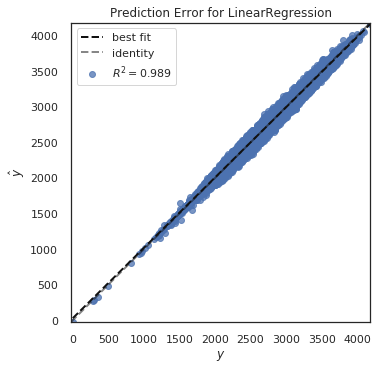

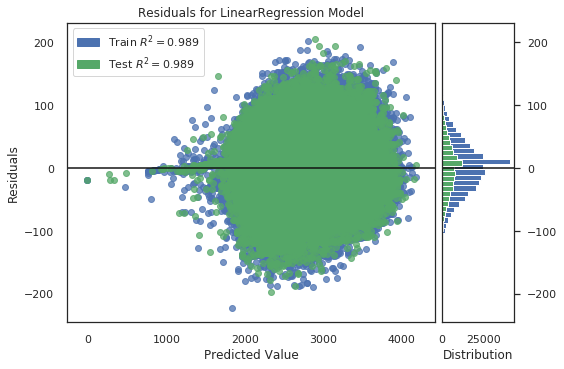

In [31]:
# solução 4: teste outra combinação

interesse = enem_eda.loc[:, (enem_eda.columns != 'NU_NOTA_COMP5') & (enem_eda.columns != 'NU_NOTA_COMP2')]
regressao_completa_para(interesse.columns)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 6) (332007,) (110669, 6) (110669,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'
 'NU_NOTA_COMP4'] como X
Desvio padrão do conjunto de testes 397.2040742092078
********************************************************************************
r2 score 0.9868667634843039
mse 2072.026141006509
mae 36.48843885274287


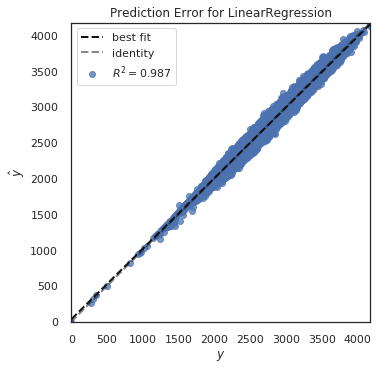

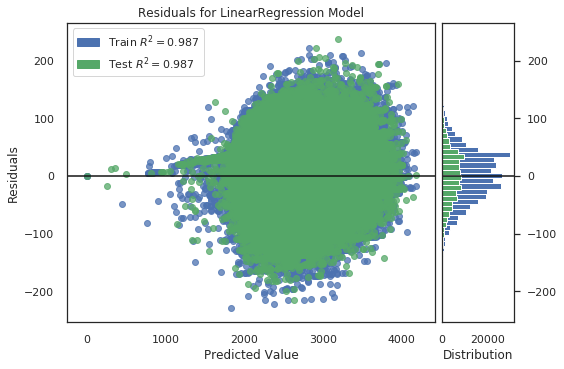

In [32]:
# solução 5: teste outra combinação

interesse = enem_eda.loc[:, (enem_eda.columns != 'NU_NOTA_COMP5') & 
                         (enem_eda.columns != 'NU_NOTA_COMP2') & 
                         (enem_eda.columns != 'NU_NOTA_COMP1')]
regressao_completa_para(interesse.columns)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 4) (332007,) (110669, 4) (110669,)
Usando colunas ['NU_NOTA_COMP4' 'NU_NOTA_COMP3' 'NU_NOTA_LC' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 397.2040742092078
********************************************************************************
r2 score 0.9081088283150016
mse 14497.63808269792
mae 95.32031694639689


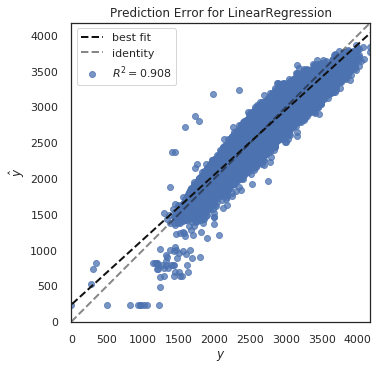

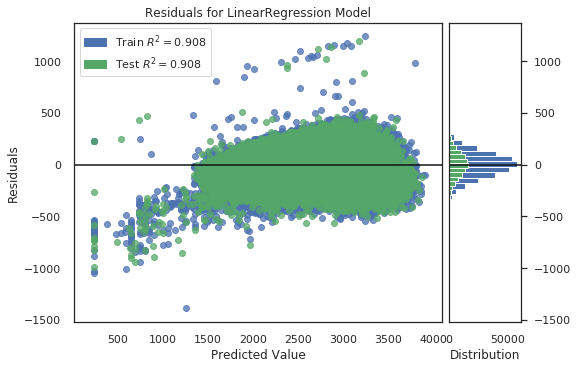

In [33]:
# solução 6: teste outra combinação

regressao_completa_para(enem_eda[ ['NU_NOTA_COMP4', 'NU_NOTA_COMP3', 'NU_NOTA_LC', 'NU_NOTA_CH', 'nota_total'] ].columns)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 2) (332007,) (110669, 2) (110669,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 397.2040742092078
********************************************************************************
r2 score 0.7225621285115902
mse 43771.276146755925
mae 157.44749800336024


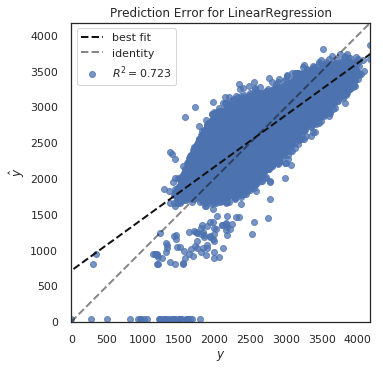

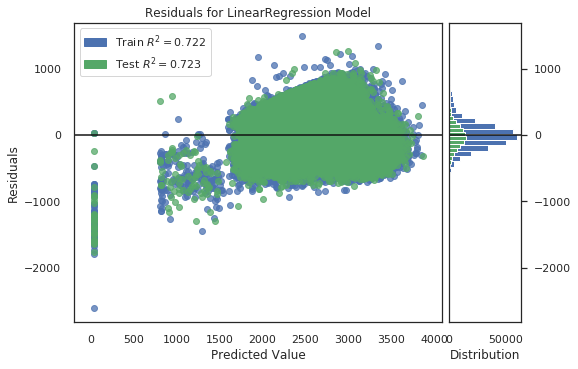

In [34]:
# solução 7: teste outra combinação

regressao_completa_para(enem_eda[ ['NU_NOTA_LC', 'NU_NOTA_CH', 'nota_total'] ].columns)

Podemos perceber que, conforme tiramos as varíaveis, o R2 diminui e o erro médio quadrático e absoluto aumentam.

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto com a de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 3) (332007,) (110669, 3) (110669,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_COMP3' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 397.2040742092078
********************************************************************************
r2 score 0.9253479426538324
mse 11777.829030666671
mae 86.15215958291097


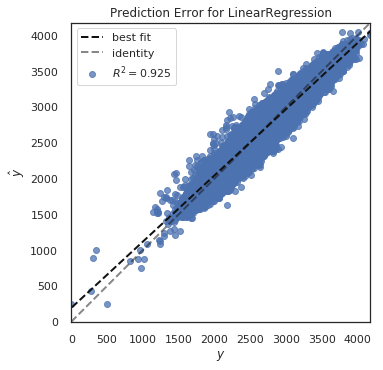

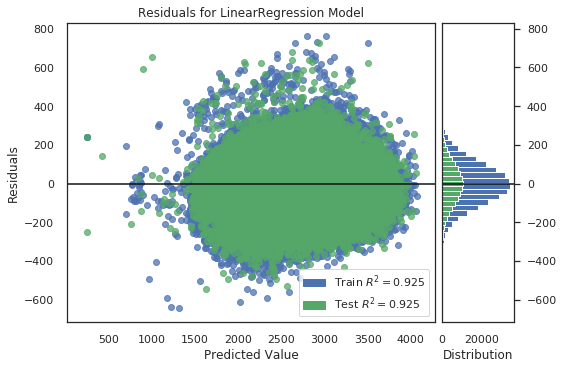

In [35]:
# solução

regressao_completa_para(enem_eda[ ['NU_NOTA_MT', 'NU_NOTA_COMP3', 'NU_NOTA_LC', 'nota_total'] ].columns)

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [0]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    # gere os modelos em uma lista
    modelos = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor() ]
    
    return modelos

In [0]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [0]:
# solução

def escolhe_dados(dados, colunas):
    # extraia as colunas
    interesse = dados[colunas]
    # faça o split
    train_x, test_x, train_y, test_y = train_test_split(dados.loc[:, dados.columns != 'nota_total'],
                                                        dados.nota_total)
    # plote o histograma de train_y
    
    n, bins, patches = plt.hist(train_y) 
    
    plt.xlabel("Notas totais")
    plt.ylabel("Número de candidatos")
    plt.title("Y treino")
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [0]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    
    # treine seu modelo
    modelo.fit(train_x, train_y)
    
    tac = time.time()
    tempo_de_treino = tac - tic
    
    # calcule a previsão para test_x
    test_pred = modelo.predict(test_x)
    
    # calcule o mse
    mse = mean_squared_error(test_y, test_pred)   
    # calcule o mae
    mae = mean_absolute_error(test_y, test_pred)
    
    print("Resultado", modelo, mse, mae)
    

    return mse, mae, tempo_de_treino

make_pipeline docs :

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

In [0]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        # use o make_pipeline ou crie um Pipeline
        pipe = make_pipeline(StandardScaler(), modelo)
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

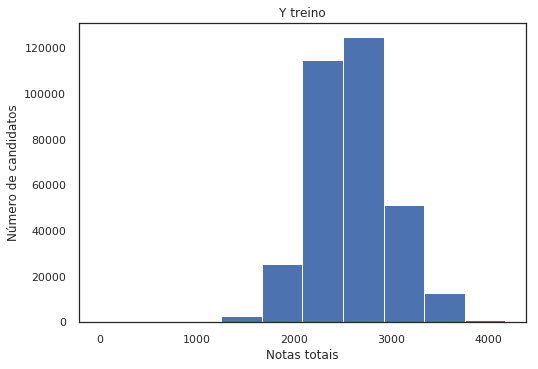

Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False) 1.3472708244429171e-25 2.6508061293620334e-13
Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False) 1.8459057141242927 1.061145351541242
Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, wi

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False) 799.1926554663004 20.000192285102425


,modelo,mse,mae,tempo_de_treino
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.000,0.000,0.165
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1.846,1.061,0.413
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.000,0.000,0.104
3,"DecisionTreeRegressor(criterion='mse', max_dep...",2322.768,35.932,2.847
4,"(DecisionTreeRegressor(criterion='mse', max_de...",799.193,20.000,17.744


In [41]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

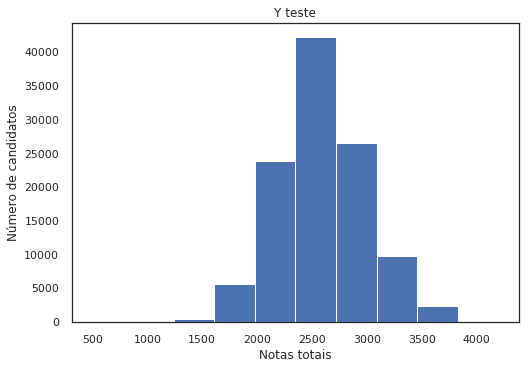

In [42]:
# solução: histograma

n, bins, patches = plt.hist(test_y) 
    
plt.xlabel("Notas totais")
plt.ylabel("Número de candidatos")
plt.title("Y teste")
plt.show()

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

Docs:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html

obs: A função quantile() também existe em um pandas dataframe:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html

In [0]:
# solução
#metodo top_p
def top_p(serie, p = 0.75):
    # calcule o quantil p
    quant = serie.quantile(p)
    print("quantile encontrado", quant)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y = []
    for val in serie:
      if(val >= quant):
        y.append(1)
      else:
        y.append(0)
    
    y = pd.Series(y)
    return y

In [44]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [45]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [46]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 2840.0


0.2500790645980356

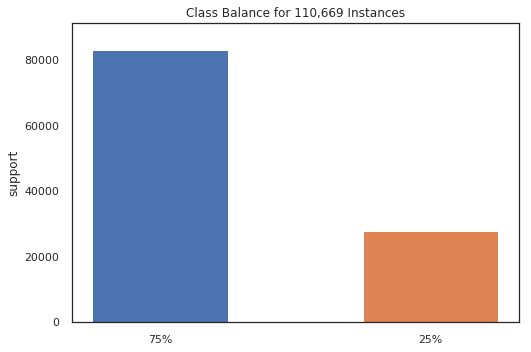

In [47]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings (agrupamentos). O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

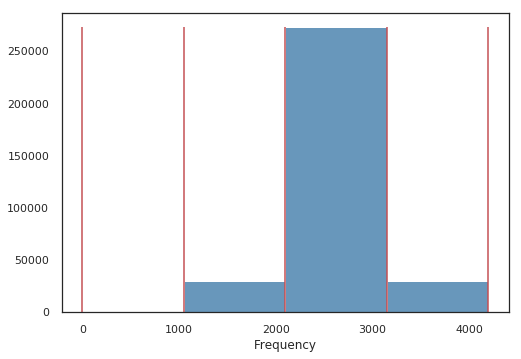

In [48]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [0]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [0]:
# solução

def gera_classificadores():
    # defina seus modelos
    modelos = [DummyClassifier(strategy = 'most_frequent'), LogisticRegression(),
               RidgeClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
               SVC()]
    return modelos

In [0]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [0]:
def split_classificacao(dados):
    # faça o seed do numpy
    np.random.seed(42367)
    # defina X como todas as colunas de `dados` exceto top_p
    x = dados.loc[:, dados.columns != 'top_p']
    # defina y como somente a coluna top_p
    y = dados.top_p
    # quebre em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y)

    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

docs:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html


In [53]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
#Coloquei o .values porque, passando Series para a coluna, os valores 0's eram
#postos como valores invalidos. Isso nao aconteceu passando os valores do Series
#em um array. Deixei o docs do pandas.Series acima.

#Antes disso eu tinha usado a funcao fillna do panda.Dataframe para mudar esses
#valores invalidos para 0, mas a media dos valores do test_y ficava abaixo de 0.24,
#ou seja, havia menos que os 25% de notas mais altas, 
#provavelmente alguns valores 1's do Series tambem estavam como invalido no
#dataframe.
interesse['top_p'] = top_p(interesse['nota_total']).values
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

interesse.head()
    

quantile encontrado 2840.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,top_p,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP3
3066813,0,514.900,418.700,100.000
249978,0,466.100,652.200,120.000
2399891,0,539.900,532.700,80.000
3959805,1,647.300,578.500,140.000
5505273,0,419.900,374.900,120.000


In [54]:
train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 3) (332007,) (110669, 3) (110669,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500790645980356


## Pergunta: implemente o treino e o teste do classificador

In [0]:
# solução:

import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine o pipeline
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a accuracy_score
    accuracy_score = pipe.score(test_x, test_y)
    print("Resultado", nome, accuracy_score)

    return accuracy_score, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [0]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    # selecione somente as colunas especificas de dados
    interesse = dados[colunas]
    # somente a coluna nota_total
    nota_total = dados.nota_total
    # defina quem está no top p
    interesse['top_p'] = top_p(nota_total).values

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2840.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 3) (332007,) (110669, 3) (110669,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500790645980356


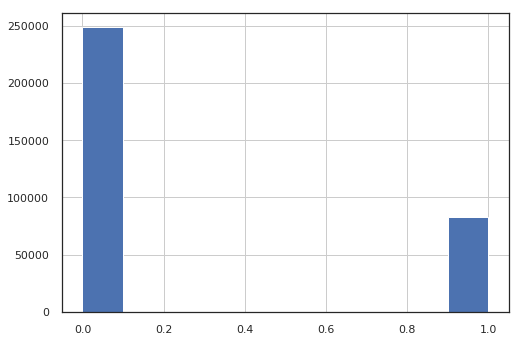

In [57]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [0]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
    
    
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2840.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 3) (332007,) (110669, 3) (110669,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500790645980356


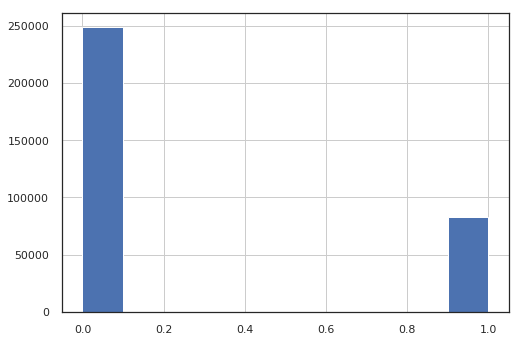

Resultado DummyClassifier 0.7499209354019644


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado LogisticRegression 0.9345796925968428
Resultado RidgeClassifier 0.9206733592966413
Resultado DecisionTreeClassifier 0.9066585945477054


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Resultado RandomForestClassifier 0.9225438017873118
Resultado SVC 0.9353025689217396


In [59]:
# solução top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, resultados = analisa_classificacao(enem_eda)
notas[["accuracy_score", "tempo_de_treino"]] = resultados[['accuracy_score', 'tempo_de_treino']]


quantile encontrado 2840.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 3) (332007,) (110669, 3) (110669,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500790645980356


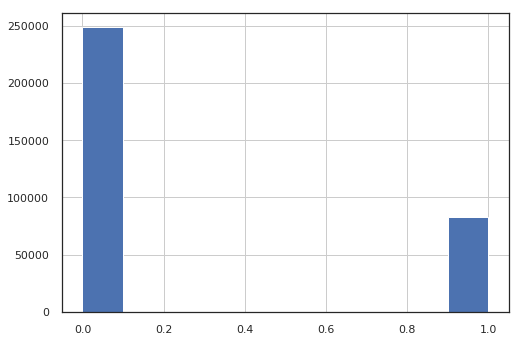

Resultado DummyClassifier 0.7499209354019644


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado LogisticRegression 0.9345796925968428
Resultado RidgeClassifier 0.9206733592966413
Resultado DecisionTreeClassifier 0.9066585945477054


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Resultado RandomForestClassifier 0.9225438017873118
Resultado SVC 0.9353025689217396


In [61]:
# solução top 20%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, resultados = analisa_classificacao(enem_eda, 0.8)
notas[["accuracy_score", "tempo_de_treino"]] = resultados[['accuracy_score', 'tempo_de_treino']]

quantile encontrado 2840.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 3) (332007,) (110669, 3) (110669,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500790645980356


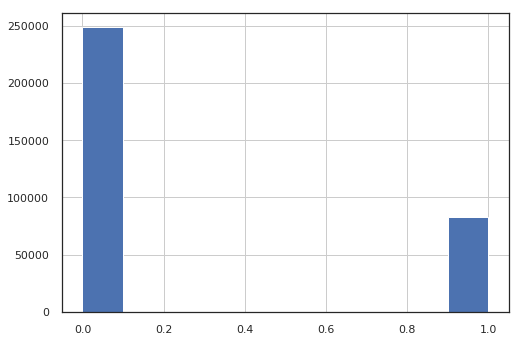

Resultado DummyClassifier 0.7499209354019644


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado LogisticRegression 0.9345796925968428
Resultado RidgeClassifier 0.9206733592966413
Resultado DecisionTreeClassifier 0.9066585945477054


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Resultado RandomForestClassifier 0.9225438017873118
Resultado SVC 0.9353025689217396


In [62]:
# solução top 10%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, resultados = analisa_classificacao(enem_eda, 0.9)
notas[["accuracy_score", "tempo_de_treino"]] = resultados[['accuracy_score', 'tempo_de_treino']]

quantile encontrado 2840.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 3) (332007,) (110669, 3) (110669,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500790645980356


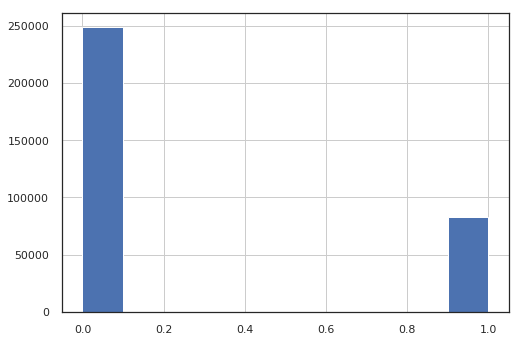

Resultado DummyClassifier 0.7499209354019644


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado LogisticRegression 0.9345796925968428
Resultado RidgeClassifier 0.9206733592966413
Resultado DecisionTreeClassifier 0.9066585945477054


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Resultado RandomForestClassifier 0.9225438017873118
Resultado SVC 0.9353025689217396


In [63]:
# solução top 5%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, resultados = analisa_classificacao(enem_eda, 0.95)
notas[["accuracy_score", "tempo_de_treino"]] = resultados[['accuracy_score', 'tempo_de_treino']]

quantile encontrado 2840.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 3) (332007,) (110669, 3) (110669,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500790645980356


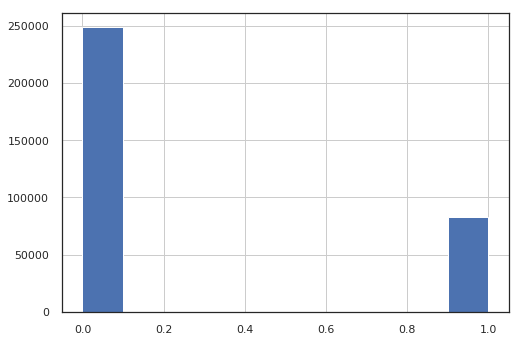

Resultado DummyClassifier 0.7499209354019644


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado LogisticRegression 0.9345796925968428
Resultado RidgeClassifier 0.9206733592966413
Resultado DecisionTreeClassifier 0.9066585945477054


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Resultado RandomForestClassifier 0.9225438017873118
Resultado SVC 0.9353025689217396


In [64]:
# solução top 1%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, resultados = analisa_classificacao(enem_eda, 0.99)
notas[["accuracy_score", "tempo_de_treino"]] = resultados[['accuracy_score', 'tempo_de_treino']]

quantile encontrado 2840.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 3) (332007,) (110669, 3) (110669,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500790645980356


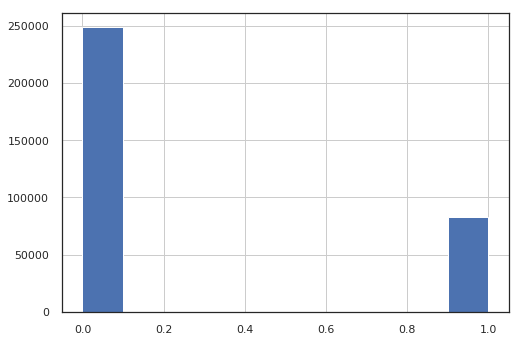

Resultado DummyClassifier 0.7499209354019644


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado LogisticRegression 0.9345796925968428
Resultado RidgeClassifier 0.9206733592966413
Resultado DecisionTreeClassifier 0.9066585945477054


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Resultado RandomForestClassifier 0.9225438017873118
Resultado SVC 0.9353025689217396


In [65]:
# solução bottom 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, resultados = analisa_classificacao(enem_eda, 0.25)
notas[["accuracy_score", "tempo_de_treino"]] = resultados[['accuracy_score', 'tempo_de_treino']]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 2840.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (332007, 3) (332007,) (110669, 3) (110669,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500790645980356


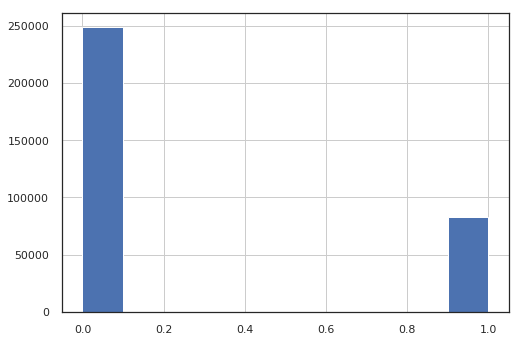

Resultado DummyClassifier 0.7499209354019644


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Resultado LogisticRegression 0.9345796925968428
Resultado RidgeClassifier 0.9206733592966413
Resultado DecisionTreeClassifier 0.9066585945477054


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Resultado RandomForestClassifier 0.9225438017873118
Resultado SVC 0.9353025689217396


In [66]:
# código pronto: rodando para top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
test_x, test_y, resultados = analisa_classificacao(enem_eda)
notas[["accuracy_score", "tempo_de_treino"]] = resultados[['accuracy_score', 'tempo_de_treino']]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [0]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


In [68]:
resultados

,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,"DummyClassifier(constant=None, random_state=No...","(StandardScaler(copy=True, with_mean=True, wit...",0.039,0.750
LogisticRegression,"LogisticRegression(C=1.0, class_weight=None, d...","(StandardScaler(copy=True, with_mean=True, wit...",0.570,0.935
RidgeClassifier,"RidgeClassifier(alpha=1.0, class_weight=None, ...","(StandardScaler(copy=True, with_mean=True, wit...",0.082,0.921
DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...","(StandardScaler(copy=True, with_mean=True, wit...",1.139,0.907
RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...","(StandardScaler(copy=True, with_mean=True, wit...",4.275,0.923
SVC,"SVC(C=1.0, cache_size=200, class_weight=None, ...","(StandardScaler(copy=True, with_mean=True, wit...",742.763,0.935


Acurácia do modelo em teste 0.9345796925968428


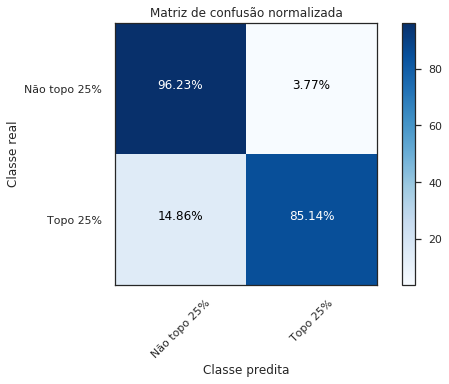

In [69]:
# código pronto

print_confusion_for(test_x, test_y, resultados.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9353025689217396


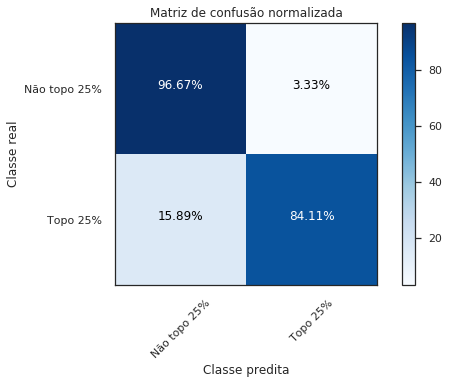

In [70]:
# código pronto

print_confusion_for(test_x, test_y, resultados.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [71]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
print(enem_validacao.shape)
print(enem_validacao.head())
del(a_usar)
del(usados_no_eda)

Para otimização temos 3984079 elementos
(3984079, 10)
   NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  ...  NU_NOTA_COMP4  NU_NOTA_COMP5  nota_total
0     445.400     589.000     621.500  ...        100.000         80.000    2681.400
3     604.000     610.400     563.900  ...        100.000         80.000    2949.500
4     482.100     569.200     570.800  ...        120.000         80.000    2786.700
5     558.800     594.900     522.800  ...        120.000         60.000    2795.000
6     625.900     636.800     588.300  ...         80.000         40.000    2858.500

[5 rows x 10 columns]


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [0]:
def separa_dados_de_classificacao_para_validacao(dados):
    # selecione as 3 colunas
    X = dados[['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_COMP3']] 
    # calcule o top 25% como 1 o bottom 75% como 0
    y = top_p(dados.nota_total)
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

docs:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [0]:
# solução

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(dados)
    #calcule o cross_val_score
    scores = cross_val_score(modelo, X, y, cv = KFold( n_splits = 5), verbose = 1, n_jobs = -1)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2839.4
Média da validação 0.25002666864788575


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.3s finished


Acurácia entre [93.48,93.50]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acurácia do modelo em teste 0.9350329147589694


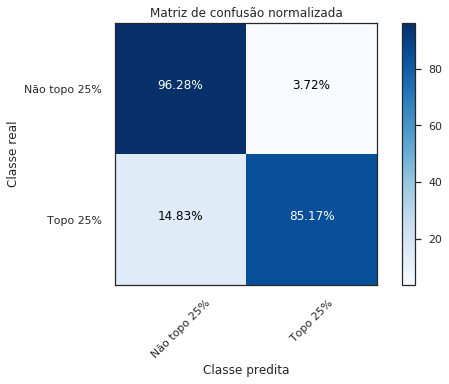

In [74]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [0]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:
     
    #top_25_quantile = 0
    
    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!", X.shape)
            
        # some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha
        parcial = X.sum(axis = 1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        # some por coluna
        parcial = X.sum(axis = 1)
        y_pred = []
        
        for nota in parcial:
          
          # compare a soma parcial com o self.top25_quantile
          y_pred_true_false = (nota >= self.top_25_quantile) 
          # 1 se for maior ou igual, 0 caso contrário
          if(y_pred_true_false == True):
            y_pred.append(1)
          else:
            y_pred.append(0)
        
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2839.4
Média da validação 0.25002666864788575


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


Acurácia entre [91.87,91.90]
top 25 quantile é 1247.90
Acurácia do modelo em teste 0.9184368583052696


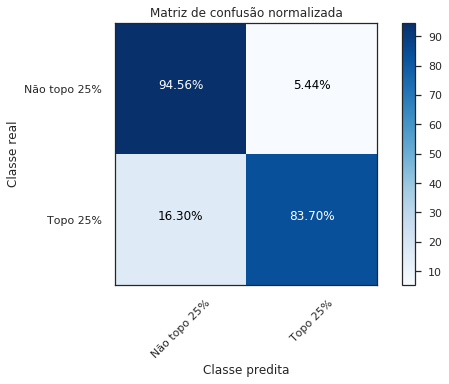

In [76]:

treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

quantile encontrado 2839.4
Média da validação 0.25002666864788575


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


Acurácia entre [62.32,62.39]
Acurácia do modelo em teste 0.6251382063458079


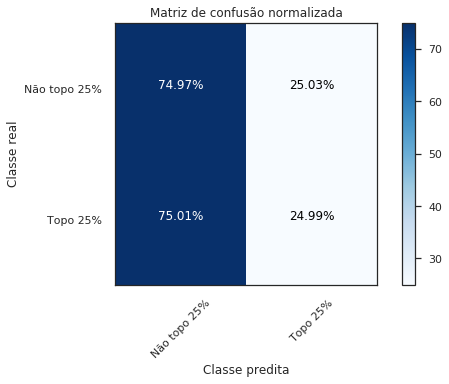

In [77]:
treina_e_valida_modelo_de_classificacao(enem_validacao, DummyClassifier())

### Solução

Quanto a acurácia, o Dummy tem um intervalo de [62.32,62.39]. O LogisticRegression tem um intervalo de [93.48,93.50] e a Heurística tem um intervalo de [91.87,91.90]. Ambos o LogisticRegression e a Heurística tiveramo intervalos de acurácia bem maiores que o DummyClassifier, o que é ótimo já que o Dummy é nosso baseline. Além disso, os resultados da Heurística não ficaram muito atrás dos resultados do LogisticRegression, uma diferença de em torno de 2%.

Quanto a matriz de confusão, DummyClassifier teve uma porcentagem razoável de verdadeiros positivos, 75%. Porém teve também uma alta porcentagem de falsos negativos, 75%. O LogisticRegression teve uma alta porecentagem de verdadeiros positvos e verdadeiro negativos, 96% e 85%. E mais uma vez os Resultados da Heurística foram similares a do LogisticRegression, 95% para verdadeiros positivos e 83% para negativos positivos.

Logo, ambos os classificadores, LogisticRegression e a Heurística, tiveram resultados melhores que o baseline e, além disso, ambos tiveram resultados similares, sendo os resultados do LogisticRegression um pouco melhores que da Heurística.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

Acho que a heurística mais simples para resolver esse problema é pegar a combinação de três notas que se consegue uma acurácia maior, pegar uma nota de corte que separa as maiores 25% notas do conjunto do resto, usando o quantil, e ir classificando nota por nota a partir dessa nota de corte.

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

   Todo modelo é pássivel de falhas. Logo é possível ele julgar álguem pertencente aos top 25%, quando este não é e vice-versa. Nós trabalhamos para que essa possibilidade seja a menor possível.

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!